In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns #conda install seaborn in the command prompt if not available
from scipy import stats
import os
get_ipython().magic('matplotlib inline')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('caschool.xlsx')


In [3]:
list(data)

['Observation Number',
 'dist_cod',
 'county',
 'district',
 'gr_span',
 'enrl_tot',
 'teachers',
 'calw_pct',
 'meal_pct',
 'computer',
 'testscr',
 'comp_stu',
 'expn_stu',
 'str',
 'avginc',
 'el_pct',
 'read_scr',
 'math_scr',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23']

In [4]:
data.head(5)
#data.shape

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,avginc,el_pct,read_scr,math_scr,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,...,22.690001,0.000000,691.599976,690.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,...,9.824000,4.583333,660.500000,661.900024,NaN,NaN,NaN,NaN,NaN,NaN
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,8.978000,30.000002,636.299988,650.900024,NaN,NaN,NaN,NaN,NaN,NaN
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,...,8.978000,0.000000,651.900024,643.500000,NaN,NaN,NaN,NaN,NaN,NaN
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,...,9.080333,13.857677,641.799988,639.900024,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
state=490172878+490161470+490155963 # replace this number with the sum of the student IDs for the members of the group

train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy() # Only for prediction

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [6]:
test.head(3)

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,avginc,el_pct,read_scr,math_scr,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,8.978000,30.000002,636.299988,650.900024,NaN,NaN,NaN,NaN,NaN,NaN
1,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,...,11.613333,40.275921,611.900024,613.400024,NaN,NaN,NaN,NaN,NaN,NaN
2,16,72041,Tulare,Pixley Union Elementary,KK-08,852,42.070000,24.214199,94.295700,80,...,7.454000,49.413143,614.799988,619.900024,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Number,336.0,210.160714,119.693456,1.000000,110.750000,207.500000,313.250000,419.000000
dist_cod,336.0,67409.666667,3521.473582,61457.000000,64059.250000,67570.000000,70488.500000,75440.000000
enrl_tot,336.0,2776.741071,4044.710932,81.000000,381.250000,909.500000,3481.250000,27176.000000
teachers,336.0,136.352347,194.969439,4.850000,19.599999,46.985001,173.079998,1429.000000
calw_pct,336.0,13.319474,11.006004,0.000000,4.662050,10.693850,19.213575,71.713097
meal_pct,336.0,45.409745,26.795360,0.000000,23.591725,44.578751,67.286676,100.000000
computer,336.0,320.836310,468.159502,0.000000,46.000000,113.500000,409.500000,3324.000000
testscr,336.0,654.151636,18.748142,605.550049,640.887512,654.149963,666.650024,706.750000
comp_stu,336.0,0.135608,0.063734,0.000000,0.095679,0.126123,0.161314,0.420833
expn_stu,336.0,5292.958673,629.413551,3926.069580,4896.660767,5203.101562,5595.549194,7711.506836


In [8]:
#data transformation
#dependent/response variable
#box-cox
y,lmbda=stats.boxcox(train['testscr'])
train['BoxCoxtest']=((train['testscr']**lmbda-1)/lmbda)
#log
train['log_testscr']=np.log(train['testscr'])
train['log_calw_pct']=np.log(train['calw_pct'])
train['log_comput_stu']=np.log(train['comput_stu'])
train['log_expn_stu']=np.log(train['expn_stu'])
train['log_avginc']=np.log(train['avginc'])
eliminate nan
train=train[train['log_testscr']>=0]
train=train[train['BoxCoxtest']>=0]

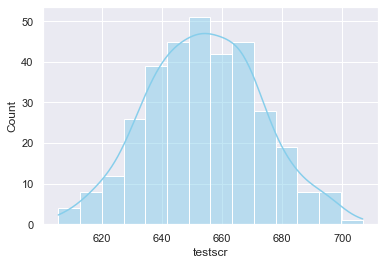

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=train, x="testscr", color="skyblue", label="test score", kde=True)
plt.show()
#it does not seem to need a transformation for response variable, but we can explore

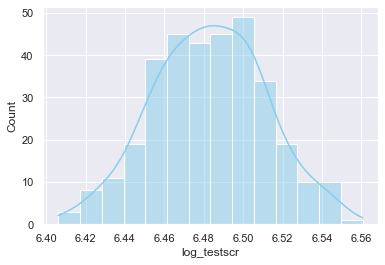

In [10]:
sns.histplot(data=train, x="log_testscr", color="skyblue", label="log test score", kde=True)
plt.show()

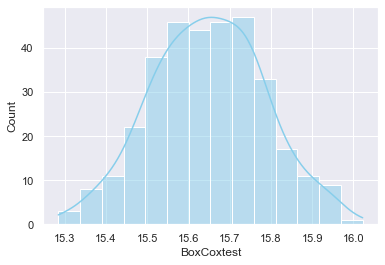

In [11]:
sns.histplot(data=train, x="BoxCoxtest", color="skyblue", label="BoxCox test score", kde=True)
plt.show()

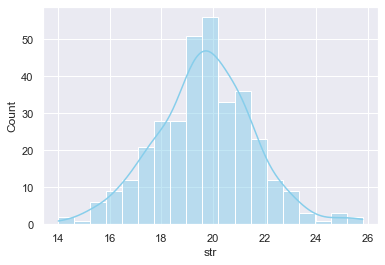

In [12]:
sns.histplot(data=train, x="str", color="skyblue", label="student teacher ratio", kde=True)
plt.show()

In [13]:
train['log_str']=np.log(train['str'])
train=train[train['log_str']>=0]

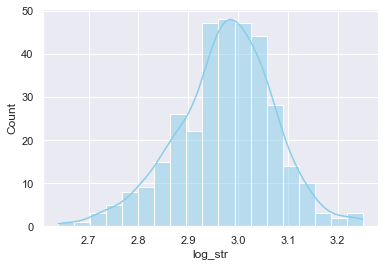

In [14]:
sns.histplot(data=train, x="log_str", color="skyblue", label="log student teacher ratio", kde=True)
plt.show()

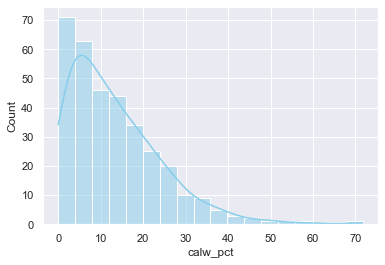

In [15]:
sns.histplot(data=train, x="calw_pct", color="skyblue", label="percent quality for CalWORKS", kde=True)
train[np.isfinite(train['log_cal'])]
plt.hist(train[np.isfinite(train['log_cal'])].values)
plt.hist(train['log_cal'].dropna().values)
sns.histplot(data=train, x="log_cal", color="skyblue", label="log percent quality for CalWORKS", kde=True)
plt.show()

In [16]:
train['log_cal']=np.log(train['calw_pct'])
#train=train[train['log_cal']>=0]

In [17]:
#sns.histplot(data=train, x="log_cal", color="skyblue", label="log percent quality for CalWORKS", kde=True)
#plt.show()

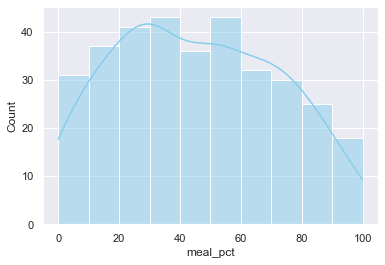

In [18]:
sns.histplot(data=train, x="meal_pct", color="skyblue", label="percent quality for reduced price lunch", kde=True)
#sns.histplot(data=train, x="log_meal", color="skyblue", label="log percent quality for reduced price lunch", kde=True)
plt.show()

In [19]:
train['log_meal']=np.log(train['meal_pct'])
#train=train[train['log_meal']>=0]

In [20]:
#sns.histplot(data=train, x="log_meal", color="skyblue", label="log percent quality for reduced price lunch", kde=True)
#plt.show()

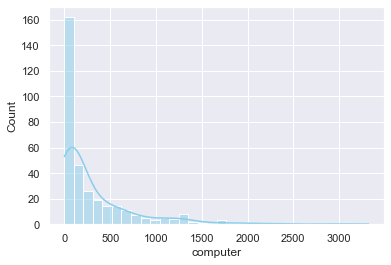

In [21]:
sns.histplot(data=train, x="computer", color="skyblue", label="number of computers", kde=True)
#sns.histplot(data=train, x="log_comp", color="skyblue", label="log of number of computers", kde=True)
plt.show()

In [22]:
train['log_comp']=np.log(train['computer'])
#train=train[train['log_comp']>=0]

In [23]:
# sns.histplot(data=train, x="log_comp", color="skyblue", label="log of number of computers", kde=True)
# plt.show()

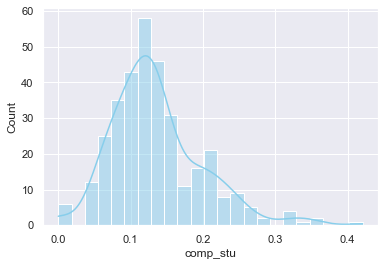

In [24]:
sns.histplot(data=train, x="comp_stu", color="skyblue", label="computer per student", kde=True)
plt.show()

In [25]:
train['log_comstu']=np.log(train['comp_stu'])
#train=train[train['log_comstu']>=0]

In [26]:
# sns.histplot(data=train, x="log_comstu", color="skyblue", label="log computer per student", kde=True)
# plt.show()

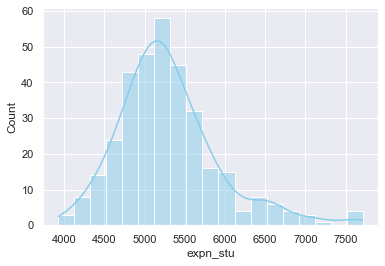

In [27]:
sns.histplot(data=train, x="expn_stu", color="skyblue", label="expenditure per student", kde=True)
plt.show()

In [28]:
train['log_exp']=np.log(train['expn_stu'])

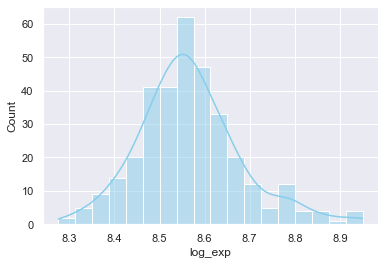

In [29]:
sns.histplot(data=train, x="log_exp", color="skyblue", label="log expenditure per student", kde=True)
plt.show()

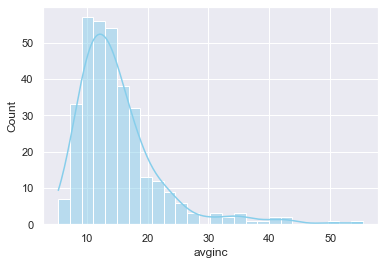

In [30]:
sns.histplot(data=train, x="avginc", color="skyblue", label="district average income", kde=True)
plt.show()

In [31]:
train['log_avg']=np.log(train['avginc'])

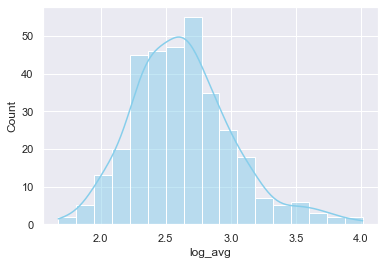

In [32]:
sns.histplot(data=train, x="log_avg", color="skyblue", label="log district average income", kde=True)
plt.show()

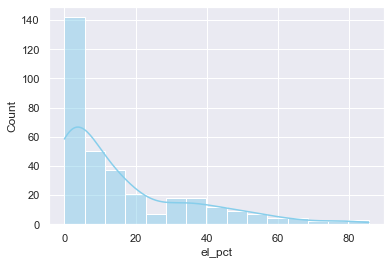

In [33]:
sns.histplot(data=train, x="el_pct", color="skyblue", label="percent of English learners", kde=True)
plt.show()

In [34]:
train['log_elpct']=np.log(train['el_pct'])
#train=train[train['log_elpct']>=0]

In [35]:
# sns.histplot(data=train, x="log_elpct", color="skyblue", label="log percent of English learners", kde=True)
# plt.show()

In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Number,336.0,2.101607e+02,119.693456,1.000000e+00,110.750000,207.500000,313.250000,419.000000
dist_cod,336.0,6.740967e+04,3521.473582,6.145700e+04,64059.250000,67570.000000,70488.500000,75440.000000
enrl_tot,336.0,2.776741e+03,4044.710932,8.100000e+01,381.250000,909.500000,3481.250000,27176.000000
teachers,336.0,1.363523e+02,194.969439,4.850000e+00,19.599999,46.985001,173.079998,1429.000000
calw_pct,336.0,1.331947e+01,11.006004,0.000000e+00,4.662050,10.693850,19.213575,71.713097
meal_pct,336.0,4.540974e+01,26.795360,0.000000e+00,23.591725,44.578751,67.286676,100.000000
computer,336.0,3.208363e+02,468.159502,0.000000e+00,46.000000,113.500000,409.500000,3324.000000
testscr,336.0,6.541516e+02,18.748142,6.055500e+02,640.887512,654.149963,666.650024,706.750000
comp_stu,336.0,1.356078e-01,0.063734,0.000000e+00,0.095679,0.126123,0.161314,0.420833
expn_stu,336.0,5.292959e+03,629.413551,3.926070e+03,4896.660767,5203.101562,5595.549194,7711.506836


In [37]:
#based on above observations, we can see that clwpct, computer, expstud, avginc, and elpct 5 predictors may need log-transformation
train.iloc[np.argmax(train.computer),:]
#some outliers exist 
#train = train.drop([227])
#list(np.argsort(-train_1.enrl_tot)[0:10])
#train_1 = train.drop([list(np.argsort(-train_1.enrl_tot)[0:9])], axis = 0)
train = train[train.enrl_tot < 13000]

#np.sort(-train_1.enrl_tot)[0:10]

In [38]:
#independent variables (log transformation)
#train['log_str']=np.log(train['str'])
#train['log_cal']=np.log(train['calw_pct'])
#train['log_meal']=np.log(train['meal_pct'])
#train['log_comp']=np.log(train['computer'])
#train['log_comstu']=np.log(train['comp_stu'])
#train['log_exp']=np.log(train['expn_stu'])
#train['log_avg']=np.log(train['avginc'])
#train['log_elpct']=np.log(train['el_pct'])
#data cleaning by eliminating NA
#train=train[train['log_cal']>=0]
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Number,325.0,2.121015e+02,119.480455,1.000000e+00,115.000000,210.000000,315.000000,419.000000
dist_cod,325.0,6.740537e+04,3551.447694,6.145700e+04,63990.000000,67504.000000,70599.000000,75440.000000
enrl_tot,325.0,2.250335e+03,2819.681763,8.100000e+01,374.000000,859.000000,3017.000000,12567.000000
teachers,325.0,1.114197e+02,136.667061,4.850000e+00,18.719999,45.000000,147.979996,620.380005
calw_pct,325.0,1.319363e+01,11.032585,0.000000e+00,4.472200,10.484700,19.130400,71.713097
meal_pct,325.0,4.503495e+01,26.892462,0.000000e+00,23.301001,43.902401,66.949203,100.000000
computer,325.0,2.654031e+02,341.345921,0.000000e+00,45.000000,105.000000,345.000000,1719.000000
testscr,325.0,6.544242e+02,18.740825,6.055500e+02,641.449951,654.299988,666.699951,706.750000
comp_stu,325.0,1.365622e-01,0.064363,0.000000e+00,0.095710,0.126316,0.164402,0.420833
expn_stu,325.0,5.295799e+03,637.556414,3.926070e+03,4886.983887,5205.941895,5599.607910,7711.506836


In [39]:
#categorical variable
#gr_span
gr_span_category={'KK-08':1,'KK-06':0}
train['gr_span']=train['gr_span'].replace(gr_span_category)
train['gr_span'].value_counts()

1    279
0     46
Name: gr_span, dtype: int64

In [40]:
train.head(3)
#set(train['dist_cod'])

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,BoxCoxtest,log_testscr,log_str,log_cal,log_meal,log_comp,log_comstu,log_exp,log_avg,log_elpct
0,327,68007,San Diego,Cardiff Elementary,0,900,50.750000,2.1018,24.336300,145,...,15.754824,6.505261,2.875483,0.742794,3.191969,4.976734,-1.825661,8.554842,3.089541,3.028522
1,219,68544,San Joaquin,Jefferson Elementary,1,865,43.500000,3.0842,12.574100,96,...,15.657567,6.484940,2.989969,1.126292,2.531639,4.564348,-2.198381,8.475851,2.679514,1.209736
2,329,67975,San Diego,Bonsall Union Elementary,1,1457,73.129997,5.9823,42.964001,0,...,15.756618,6.505635,2.991896,1.788805,3.760363,-inf,-inf,8.635426,2.995582,3.312500


In [41]:
#predictors=train['enrl_tot','teachers','calw_pct','meal_pct','computer','comp_stu','expn_stu','str','avginc','el_pct']
#print(predictors)

In [42]:
test=['testscr','log_testscr','BoxCoxtest']

In [43]:
#Univariate for response variable testscr
table1_1=train[test].describe().round(2)
table1_1.loc['Skew',:]=train[test].skew()
table1_1.loc['Kurt', :]=train[test].kurt()
table1_1.to_csv('table1_1.csv')
table1_1.round(2)

,testscr,log_testscr,BoxCoxtest
count,325.00,325.00,325.00
mean,654.42,6.48,15.65
std,18.74,0.03,0.14
min,605.55,6.41,15.28
25%,641.45,6.46,15.56
50%,654.30,6.48,15.65
75%,666.70,6.50,15.74
max,706.75,6.56,16.02
Skew,0.03,-0.05,-0.03
Kurt,-0.18,-0.18,-0.18


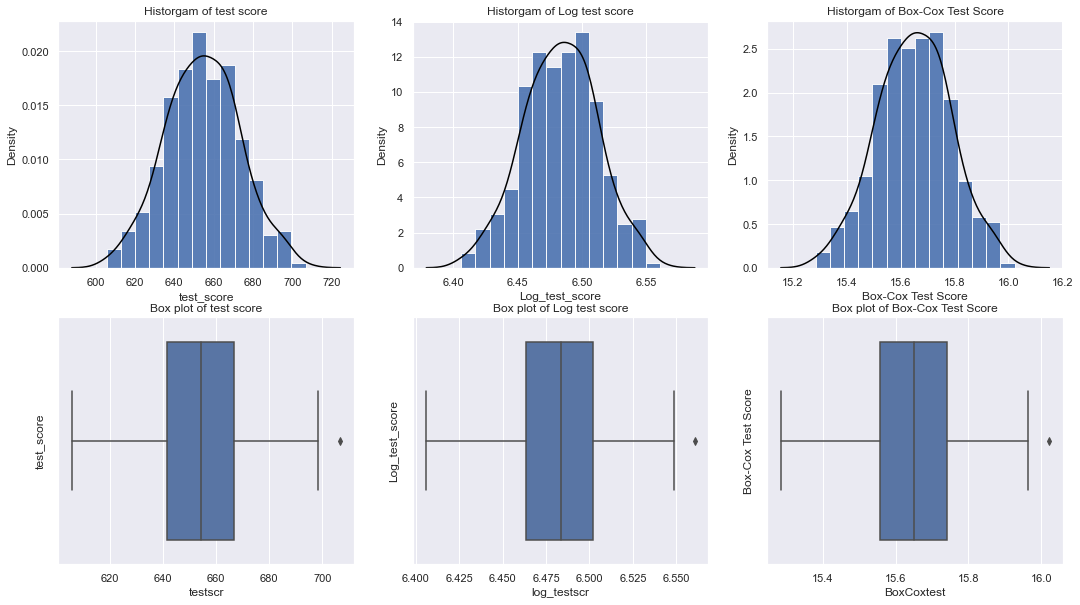

In [44]:
#plot distribution and the boxplot of the responses
fig, ax= plt.subplots(2,3, figsize=(18,10))
sns.distplot(train['testscr'], ax=ax[0,0], kde=True,hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6})
ax[0,0].set(title='Historgam of test score', xlabel='test_score')
sns.boxplot(train['testscr'], data=train, orient='v', ax=ax[1,0])
ax[1,0].set(title='Box plot of test score', ylabel='test_score')

sns.distplot(train['log_testscr'], ax=ax[0,1], kde=True,hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6})
ax[0,1].set(title='Historgam of Log test score', xlabel='Log_test_score')
sns.boxplot(train['log_testscr'], data=train, orient='v', ax=ax[1,1])
ax[1,1].set(title='Box plot of Log test score', ylabel='Log_test_score')

sns.distplot(train['BoxCoxtest'], ax=ax[0,2], kde=True,hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha':
0.6})
ax[0,2].set(title='Historgam of Box-Cox Test Score', xlabel='Box-Cox Test Score')
sns.boxplot(train['BoxCoxtest'], data=train, orient='v', ax=ax[1,2])
ax[1,2].set(title='Box plot of Box-Cox Test Score', ylabel='Box-Cox Test Score')
plt.show()
fig.savefig("1.1.png",format="png",dpi=250)

#seems to have an outlier in the response variable, let's detect it

In [45]:
train['z_score']=stats.zscore(train['testscr'])
z = np.abs(stats.zscore(train['testscr']))
print(z)
np.max(train['z_score'])

[0.76025508 0.04145998 0.77361551 1.59652364 0.13756849 1.13701858
 0.68276067 1.43629093 0.07076633 1.16106801 0.93394068 0.90187369
 1.20372827 0.51976732 1.08882726 1.97337961 0.81093291 0.65337163
 2.18447507 0.91247349 0.28729387 0.8804065  1.27587656 0.93660886
 2.15775747 0.04671364 1.14227225 0.92058025 0.52778163 0.20437064
 1.39077431 0.82171111 0.65337163 0.50640689 1.28131189 0.73077032
 1.57514891 2.33945411 1.61790163 2.79638346 0.91790556 0.64802877
 0.69336372 1.05952743 1.62334023 0.29255079 1.30268662 1.26260859
 0.1135158  0.39952345 0.43960474 1.49775022 0.29264    0.16705325
 0.11351906 0.91790556 0.26324444 0.12697196 0.58380558 2.00277516
 1.02211757 1.94389485 0.43149797 0.41279141 1.08615909 1.55644561
 0.94195499 0.11895439 0.14567526 1.38275674 0.35934969 0.18041042
 1.85313573 1.19838541 1.74616308 0.65603981 0.51174976 0.12697196
 0.10817293 0.4635617  0.02275668 0.39943424 0.14023666 1.37207101
 0.39684875 0.66405737 0.5037322  0.60785501 1.54852051 2.2512

2.796383460007513

In [46]:
#threshold = 3
#print(np.where(z > 3))
train = train.loc[train['z_score'].abs()<=2.7]

In [47]:
#print(z[120])

<AxesSubplot:xlabel='gr_span', ylabel='testscr'>

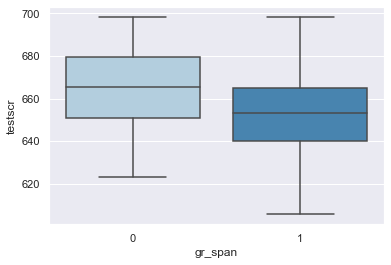

In [48]:
#with categorical variables
table1_2=train.groupby('gr_span')['testscr'].describe().unstack()
table1_2.round(2)
sns.boxplot(train['gr_span'],train['testscr'],palette='Blues')

#based on the graph, the log test score have some distinctions between span of district 0 and 1
#the span of 0 has much higher average scores compared to span of 1

In [49]:
#you can mimic the codes above to run categorical analysis for other variables
list(train)

['Observation Number',
 'dist_cod',
 'county',
 'district',
 'gr_span',
 'enrl_tot',
 'teachers',
 'calw_pct',
 'meal_pct',
 'computer',
 'testscr',
 'comp_stu',
 'expn_stu',
 'str',
 'avginc',
 'el_pct',
 'read_scr',
 'math_scr',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'BoxCoxtest',
 'log_testscr',
 'log_str',
 'log_cal',
 'log_meal',
 'log_comp',
 'log_comstu',
 'log_exp',
 'log_avg',
 'log_elpct',
 'z_score']

In [50]:
#binary analysis
#correlation of all variables
variables=[ 'testscr',
    #'enrl_tot',
 #'teachers',
 'calw_pct',
 #'meal_pct',
 'computer',
 'comp_stu',
 'expn_stu',
 'str',
 'avginc',
 'el_pct',
 #'read_scr',
# 'math_scr'
          ]
corr_matrix=data[variables].corr()
corr_matrix
#tryout different options and demonstrate it in your report
# We end up with 7 predictors
#'testscr','calw_pct','computer','comp_stu','expn_stu','str','avginc','el_pct',


,testscr,calw_pct,computer,comp_stu,expn_stu,str,avginc,el_pct
testscr,1.000000,-0.626853,-0.073736,0.270703,0.191273,-0.226363,0.712431,-0.644124
calw_pct,-0.626853,1.000000,0.059160,-0.151968,0.067889,0.018276,-0.512651,0.319576
computer,-0.073736,0.059160,1.000000,-0.042422,-0.071311,0.233826,0.094343,0.291339
comp_stu,0.270703,-0.151968,-0.042422,1.000000,0.286560,-0.307070,0.194806,-0.251007
expn_stu,0.191273,0.067889,-0.071311,0.286560,1.000000,-0.619982,0.314484,-0.071396
str,-0.226363,0.018276,0.233826,-0.307070,-0.619982,1.000000,-0.232194,0.187642
avginc,0.712431,-0.512651,0.094343,0.194806,0.314484,-0.232194,1.000000,-0.307419
el_pct,-0.644124,0.319576,0.291339,-0.251007,-0.071396,0.187642,-0.307419,1.000000


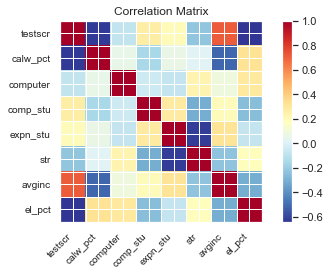

In [51]:
sm.graphics.plot_corr(corr_matrix, xnames=variables)
plt.show()

<AxesSubplot:xlabel='str', ylabel='testscr'>

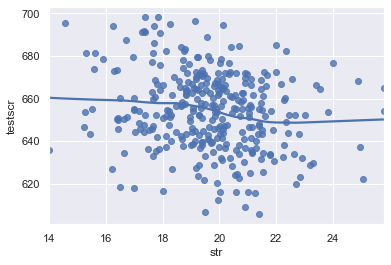

In [52]:
#run regression of class size and test scores
# Assumption 1: linearity
#p = sns.pairplot(train, x_vars=['str'], y_vars='testscr', size=4, aspect=1)
sns.regplot(train['str'], train['testscr'], lowess=True)
#By looking at the plots we can see that with the test score and class size are not linear
# Therefore, linear regression might not be a good fit for the model

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
#choose the variable to run regression
x = train['str'].values.reshape(-1,1)
y = train['testscr'].values.reshape(-1,1)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [55]:
#split test and train set, in here 20% is the test set--you can explore different split(0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [57]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.02019642279952638


In [58]:
#Residuals as we know are the differences between the true value and the predicted value. 
#One of the assumptions of linear regression is that the mean of the residuals should be zero.

residuals = y_train-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
#very close to zero so all good here



Mean of Residuals 2.4141992566366337e-14


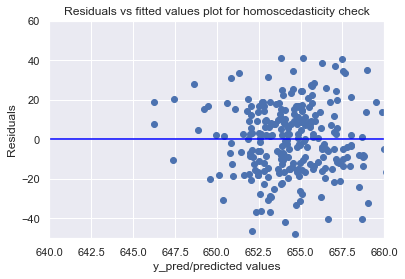

In [59]:
#homoscedasticity
plt.scatter(np.array(y_pred),np.array(residuals))

plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-50,60)
plt.xlim(640,660)
p = sns.lineplot([0,660],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [60]:
#Goldfeld Quandt Test
#Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

#Null Hypothesis: Error terms are homoscedastic
#Alternative Hypothesis: Error terms are heteroscedastic.
#Since p value is more than 0.05 in Goldfeld Quandt Test, 
#we can't reject it's null hypothesis that error terms are homoscedastic.
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9628062900043808), ('p-value', 0.5847929084862062)]

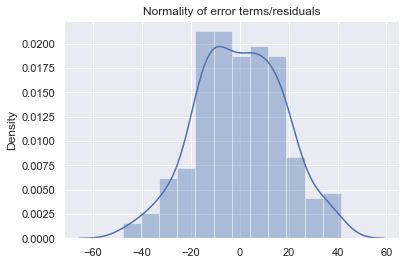

In [61]:
#Normality of the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

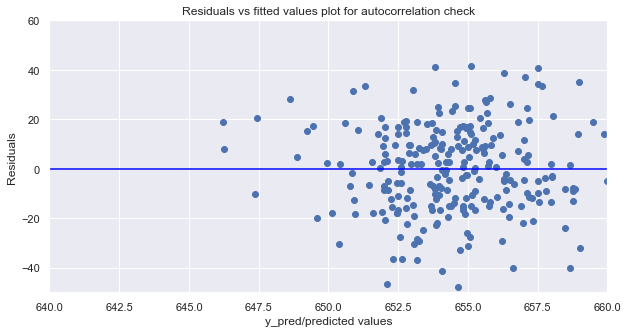

In [62]:
#There should not be autocorrelation in the data so the error terms should not form any pattern
plt.figure(figsize=(10,5))
plt.scatter(np.array(y_pred),np.array(residuals))
#p = plt.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-50,60)
plt.xlim(640,660)
p = sns.lineplot([0,660],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [63]:
#Ljungbox test
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

#Null Hypothesis: Autocorrelation is absent.
#Alternative Hypothesis: Autocorrelation is present.
#Since p value is greater than 0.05 
#we fail to reject the null hypothesis.

0.5338641093606987

In [64]:
#summary which assumptions are violated, which are not
#参考：https://www.kaggle.com/shrutimechlearn/step-by-step-assumptions-linear-regression

In [65]:
model = smf.ols(formula='testscr ~ str', data=train)
reg = model.fit()
print(reg.summary())
#based on r-square and p value, we know it is a very bad model

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     12.84
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           0.000391
Time:                        15:24:23   Log-Likelihood:                -1399.0
No. Observations:                 324   AIC:                             2802.
Df Residuals:                     322   BIC:                             2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    691.7624     10.513     65.799      0.0

In [66]:
#resid=reg.resid
#sns.regplot('testscr', resid, data=train, fit_reg=False)
#plt.ylabel('Residuals')
#plt.show()

In [67]:
#run models
formula = 'testscr ~ str + meal_pct +calw_pct+ computer+ comp_stu + expn_stu + avginc + el_pct'
ols2 = smf.ols(formula=formula, data=train).fit()
print(ols2.summary())
resid = ols2.resid
fitted = ols2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          3.78e-102
Time:                        15:24:24   Log-Likelihood:                -1152.0
No. Observations:                 324   AIC:                             2322.
Df Residuals:                     315   BIC:                             2356.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    661.5532     10.369     63.800      0.0

In [68]:
features= train[['str', 'meal_pct', 'calw_pct','computer','comp_stu', 'expn_stu', 'avginc', 'el_pct']]
features=sm.add_constant(features)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(8):
    vif.append(variance_inflation_factor(features.values,i+1))

print(vif)
#mealpct vif>5, should be eliminated

[1.718836381721825, 5.545412695866735, 2.6999088825838147, 1.301944772658746, 1.1820234093717679, 1.876343702765528, 2.314541827262176, 2.488281937875674]


In [69]:
formula = 'testscr ~ str + calw_pct+ computer+ comp_stu + expn_stu + avginc + el_pct'
ols3 = smf.ols(formula=formula, data=train).fit()
print(ols3.summary())
resid = ols3.resid
fitted = ols3.fittedvalues
#r-squared reduced, but str does not become more significant, so it might not be a big deal to include the variable

rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           6.25e-88
Time:                        15:24:25   Log-Likelihood:                -1188.4
No. Observations:                 324   AIC:                             2393.
Df Residuals:                     316   BIC:                             2423.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    650.4769     11.501     56.560      0.0

In [86]:
train['gr_calw']=train['gr_span']* train['calw_pct']
train['str_span']=train['str']* train['gr_span']
train['gr_computer']=train['gr_span']* train['computer']



# test['gr_calw']=test['gr_span']* test['calw_pct']
# test['str_span']=test['str']* test['gr_span']
# test['gr_computer']=test['gr_span']* test['computer']

TypeError: tuple indices must be integers or slices, not str

In [71]:
formula = 'testscr ~ str + meal_pct +calw_pct+ computer+ comp_stu + expn_stu + avginc + el_pct+gr_calw+str_span'
ols2 = smf.ols(formula=formula, data=train).fit()
print(ols2.summary())
resid2 = ols2.resid
fitted2 = ols2.fittedvalues

#best

rmse3=ols2.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          8.62e-102
Time:                        15:24:26   Log-Likelihood:                -1147.7
No. Observations:                 324   AIC:                             2317.
Df Residuals:                     313   BIC:                             2359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.9775     10.369     64.130      0.0

Text(0.5, 0, 'Index')

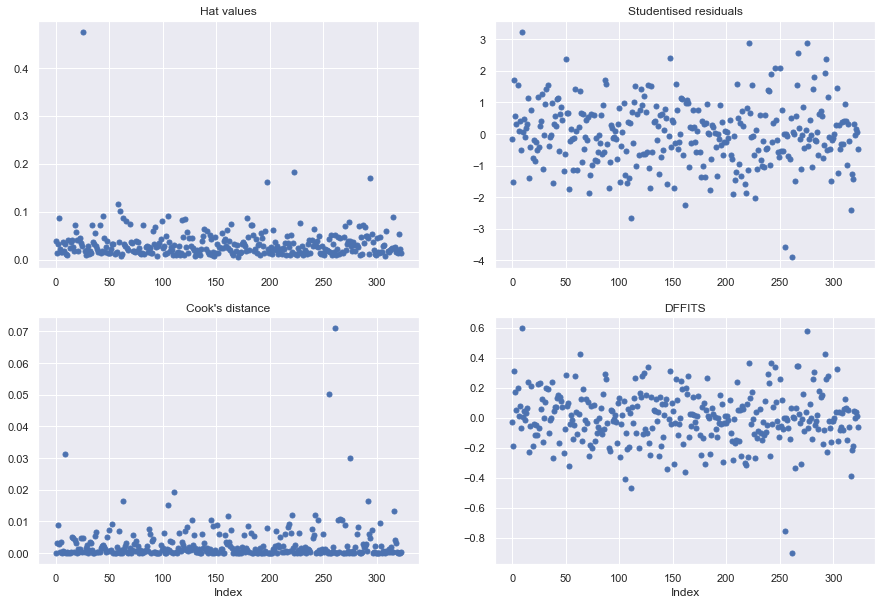

In [72]:
influence=ols2.get_influence()
hat = influence.hat_matrix_diag
resid= influence.resid_studentized_external 
d= influence.cooks_distance[0]
dffits= influence.dffits[0]
fig, ax= plt.subplots(2, 2, figsize=(15, 10)) 
ax[0,0].scatter(np.arange(0,len(hat)), hat, s=25)
ax[0,0].set_title('Hat values') 
ax[0,1].scatter(np.arange(0,len(resid)), resid, s=25)
ax[0,1].set_title('Studentised residuals')
ax[1,0].scatter(np.arange(0,len(d)), d, s=25) 
ax[1,0].set_title('Cook\'s distance') 
ax[1,0].set_xlabel('Index')
ax[1,1].scatter(np.arange(0,len(dffits)), dffits, s=25) 
ax[1,1].set_title('DFFITS') 
ax[1,1].set_xlabel('Index')

Text(0.5, 1.0, 'Normal Q-Q plot for the residuals')

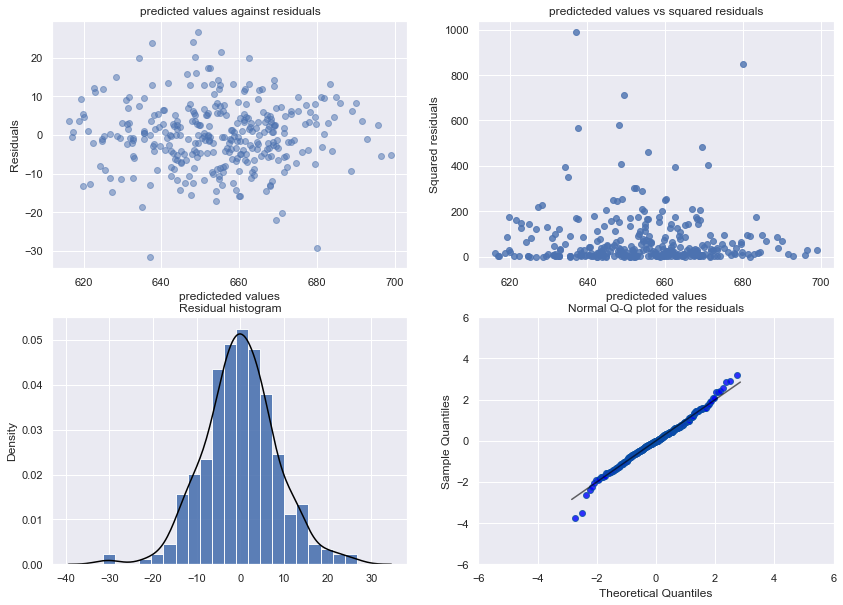

In [73]:
pred3_1=ols2.predict(train)
residuals=ols2.resid

fitted=pred3_1

fig, ax= plt.subplots(2,2, figsize=(14,10))
sns.regplot(fitted, residuals, fit_reg=False, ax=ax[0,0], scatter_kws={'alpha':0.5}) 
ax[0,0].set_xlabel('predicteded values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('predicted values against residuals', fontsize=12)
sns.regplot(fitted, residuals**2, fit_reg=False, ax=ax[0,1]) 
ax[0,1].set_xlabel('predicteded values') 
ax[0,1].set_ylabel('Squared residuals')
ax[0,1].set_title('predicteded values vs squared residuals')
#sns.boxplot(residuals, orient='h', ax=ax[0,1]) #ax[0,1].set_title('Box plot for the residuals', fontsize=12)
sns.distplot(residuals, ax=ax[1,0], hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6}) 
ax[1,0].set(title='Residual histogram')
pp = sm.ProbPlot(residuals, fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,1]) 
a=ax[1,1].get_xlim()[0]
b=ax[1,1].get_xlim()[1]
ax[1,1].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,1].set_xlim(-6,6)
ax[1,1].set_ylim(-6,6)
ax[1,1].set_title('Normal Q-Q plot for the residuals')

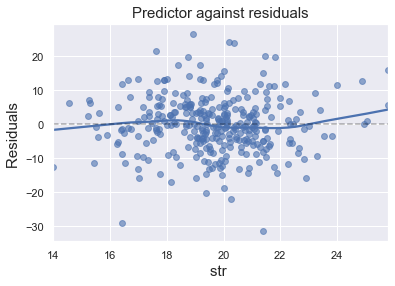

In [74]:
fig,ax = plt.subplots()
sns.regplot(train['str'],residuals,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('str ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

In [75]:
features= train[['str' , 'meal_pct' ,'calw_pct' ,'computer' ,'comp_stu','expn_stu','avginc','el_pct','gr_calw','str_span']]
features=sm.add_constant(features)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(10):
    vif.append(variance_inflation_factor(features.values,i+1))

print(vif)

[1.798845245260109, 5.594243401122456, 9.035095862078228, 1.3465580545785405, 1.1871450429633559, 1.9589900304514638, 2.3276214619402427, 2.5391156047309633, 8.718025968188973, 2.4158034933039816]


In [76]:
sum(vif)/len(vif)

3.6921444164618316

In [77]:
formula = 'testscr ~ str + str_span+gr_computer+expn_stu+calw_pct'
ols4 = smf.ols(formula=formula, data=train).fit()
print(ols4.summary())
resid4 = ols4.resid
fitted4 = ols4.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     50.40
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           2.28e-38
Time:                        15:24:28   Log-Likelihood:                -1310.8
No. Observations:                 324   AIC:                             2634.
Df Residuals:                     318   BIC:                             2656.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     661.7713     16.783     39.430      

In [78]:
formula = 'testscr ~ str + str_span+gr_computer+expn_stu+comp_stu'
ols5 = smf.ols(formula=formula, data=train).fit()
print(ols5.summary())
resid5 = ols5.resid
fitted5 = ols5.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     6.958
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.48e-06
Time:                        15:24:28   Log-Likelihood:                -1388.5
No. Observations:                 324   AIC:                             2789.
Df Residuals:                     318   BIC:                             2812.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     667.0501     21.428     31.130      

In [79]:
formula = 'testscr ~ str + str_span+gr_computer+expn_stu+el_pct+np.power(el_pct, 2)'
ols6 = smf.ols(formula=formula, data=train).fit()
print(ols6.summary())
resid6 = ols6.resid
fitted6 = ols6.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     55.22
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.90e-46
Time:                        15:24:28   Log-Likelihood:                -1289.4
No. Observations:                 324   AIC:                             2593.
Df Residuals:                     317   BIC:                             2619.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             671.9260    

In [80]:
formula = 'testscr ~ str + str_span+gr_computer+expn_stu+el_pct+np.power(el_pct, 2)+calw_pct'
ols7 = smf.ols(formula=formula, data=train).fit()
print(ols7.summary())
resid7 = ols7.resid
fitted7 = ols7.fittedvalues


rmse3=ols7.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     96.12
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.97e-74
Time:                        15:24:29   Log-Likelihood:                -1220.5
No. Observations:                 324   AIC:                             2457.
Df Residuals:                     316   BIC:                             2487.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             663.2640    

In [81]:
formula = 'testscr ~ str + str_span+gr_computer+expn_stu+el_pct+np.power(el_pct, 2)+avginc'
ols8 = smf.ols(formula=formula, data=train).fit()
print(ols8.summary())
resid8 = ols8.resid
fitted8 = ols8.fittedvalues

rmse3=ols8.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     108.3
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           4.60e-80
Time:                        15:24:29   Log-Likelihood:                -1207.1
No. Observations:                 324   AIC:                             2430.
Df Residuals:                     316   BIC:                             2461.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             660.7813    

In [82]:
formula = 'testscr ~ str + str_span+gr_computer+expn_stu+el_pct+np.power(el_pct, 2)+str'
ols9 = smf.ols(formula=formula, data=train).fit()
print(ols9.summary())
resid9 = ols9.resid
fitted9 = ols9.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     55.22
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.90e-46
Time:                        15:24:30   Log-Likelihood:                -1289.4
No. Observations:                 324   AIC:                             2593.
Df Residuals:                     317   BIC:                             2619.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             671.9260    

In [83]:
formula = 'testscr ~ str + str_span+gr_computer+expn_stu+el_pct+np.power(el_pct, 2)+computer'
ols10 = smf.ols(formula=formula, data=train).fit()
print(ols10.summary())
resid10 = ols10.resid
fitted10 = ols10.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     48.45
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.77e-46
Time:                        15:24:30   Log-Likelihood:                -1287.2
No. Observations:                 324   AIC:                             2590.
Df Residuals:                     316   BIC:                             2621.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             672.4631    

In [84]:
#model selection
#interaction of grspan&student (1)
#interaction of grspan&comp_stu (2)
#log transformation of 'calw_pct','computer','expn_stu','avginc','el_pct' (3)
#square of str, cubic of str, (5-6)
#train['expn_stu']

In [85]:
#prediction
train['gr_calw']=train['gr_span']* train['calw_pct']
train['str_span']=train['str']* train['gr_span']
#train['']

# test['gr_calw']=test['gr_span']* test['calw_pct']
# test['str_span']=test['str']* test['gr_span']

TypeError: tuple indices must be integers or slices, not str

In [86]:
#prediction
formula = 'testscr ~ str + meal_pct +calw_pct+ computer+ comp_stu + expn_stu + avginc + el_pct+gr_calw+str_span'
ols2 = smf.ols(formula=formula, data=train).fit()
print(ols2.summary())
resid = ols2.resid
fitted = ols2.fittedvalues


rmse3=ols2.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          8.62e-102
Time:                        15:22:23   Log-Likelihood:                -1147.7
No. Observations:                 324   AIC:                             2317.
Df Residuals:                     313   BIC:                             2359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.9775     10.369     64.130      0.0

In [87]:
#predict  ？？？？？？
# plt.scatter(np.array(test['testscr']), ols2.predict(test))
# plt.xlabel('Observation')
# plt.ylabel('Prediction')
# plt.title('Observations Vs Prediction for the Test Set')

In [ ]:
formula3 = 'testscr ~ str + meal_pct + calw_pct + computer + comp_stu+expn_stu +avginc+ el_pct+gr_calw+str_span'
ols3 = smf.ols(formula=formula3,data=test).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

ERROR! Session/line number was not unique in database. History logging moved to new session 338


In [ ]:
# predictions = ols2.predict(test)
# rmse = np.sqrt(np.sum((predictions-test.testscr)**2)/test.shape[0])
# rmse/np.mean(test.testscr)
# rmse

ERROR! Session/line number was not unique in database. History logging moved to new session 337


In [1]:
# r2 = 1 - np.sum((predictions-test.testscr)**2)/np.sum((test.testscr - np.mean(test.testscr))**2)
# r2

In [2]:
# mad = (np.sum(np.abs(test.testscr - np.median(test.testscr))))/test.shape[0]
# mad

In [3]:
#train['gr_calw']=train['gr_span']* train['calw_pct']
#train['str_el']=train['str']* train['el_pct']
#np.std(test.testscr)